In [59]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd

In [60]:
def Hill(x, n = 1):
    return x**n / (1 + x**n)

def AbsHill(x, n = 1):
    return x**n / (1 + np.abs(x)**n)

In [61]:
x1_list = np.linspace(-10, 10, 101)
x2_list = np.linspace(-10, 10, 101)
X1, X2 = np.meshgrid(x1_list, x2_list)
levels = np.arange(-1, 1, 0.05)

In [62]:
def plot_surface(X1, X2, Z, levels=None):
    fig = plt.figure(figsize=plt.figaspect(0.45))

    ax = fig.add_subplot(1, 2, 1)
    cont = ax.contourf(X1, X2, Z, levels, vmin=-1, vmax=1)
    ax.contour(X1, X2, Z, levels, vmin=-1, vmax=1, colors='black', linewidths=1)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    fig.colorbar(cont)

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    surf = ax.plot_surface(X1, X2, Z, cmap=cm.viridis, vmin=-1, vmax=1, rstride=1, cstride=1, antialiased=False)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlim([-1, 1])
    fig.colorbar(surf)
    fig.tight_layout()

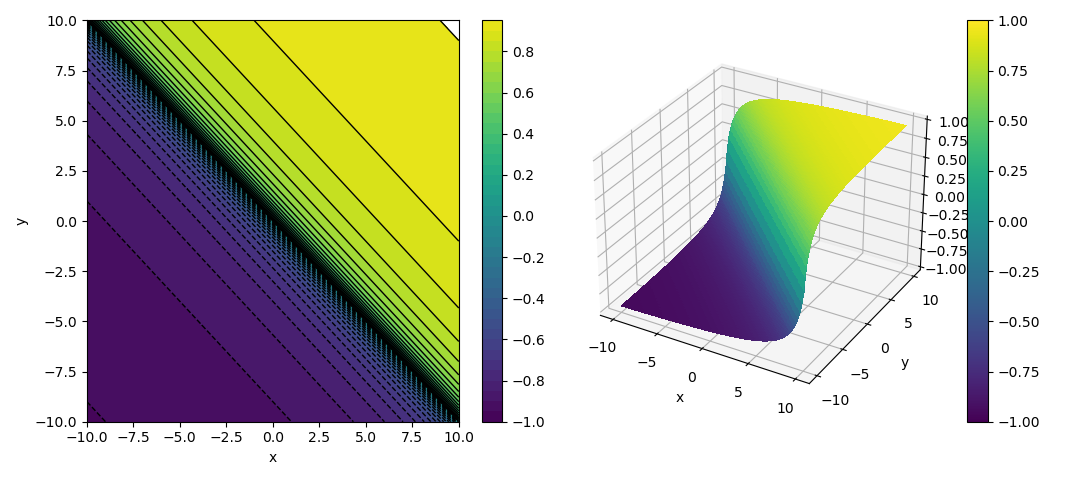

In [63]:
Z = AbsHill(X1 + X2)
plot_surface(X1, X2, Z, levels)

### Allosteric Inhibition

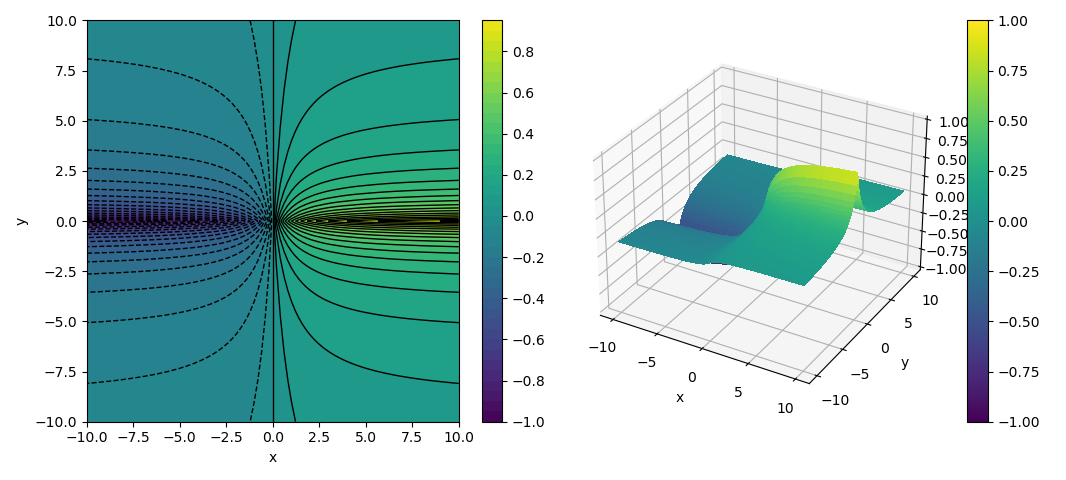

In [64]:
_X2 = X2.copy()
_X2[_X2 < 0] = np.nan
Z = (1 / (1 + np.abs(X2))) * AbsHill(X1)
plot_surface(X1, X2, Z, levels)

### Competitive Inhibition

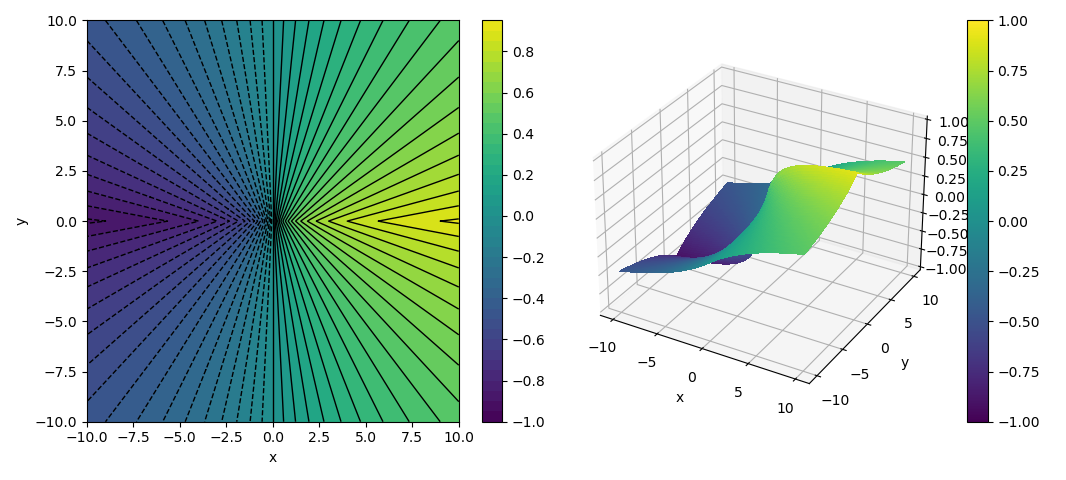

In [65]:
Z = AbsHill(X1/(1 + np.abs(X2)))
plot_surface(X1, X2, Z, levels)

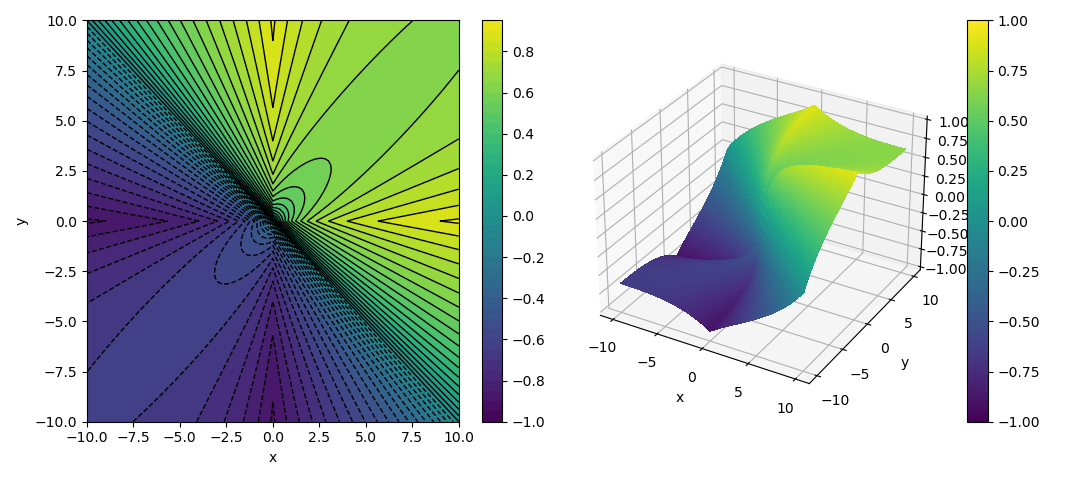

In [66]:
Z = AbsHill(X1/(1 + np.abs(X2)) + X2/(1 + np.abs(X1)))
plot_surface(X1, X2, Z, levels)